In [24]:
## Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [25]:
## Importing dataset
raw_data = pd.read_csv(r"C:\Users\UTKARSH\OneDrive\Desktop\UTKARSH FOLDER\Data cognizer\1.04. Real-life example.csv")

In [26]:
## Displaying data
display(raw_data)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [27]:
display(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


None

In [28]:
display(raw_data.describe(include = 'all'))

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [29]:
## Droping the columns 
data = raw_data.drop(['Model'],axis=1)

In [30]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [31]:
## Dealing with null values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [32]:
data_no_mv = data.dropna(axis = 0)

In [33]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [34]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


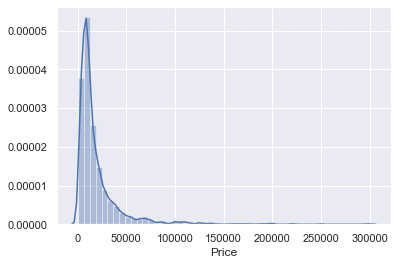

In [35]:
## Exploring the PDFs
sns.distplot(data_no_mv["Price"])

In [36]:
##Dropping the outliers
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


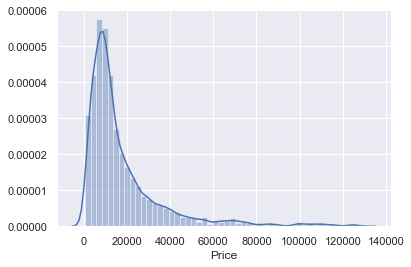

In [37]:
sns.distplot(data_1["Price"])

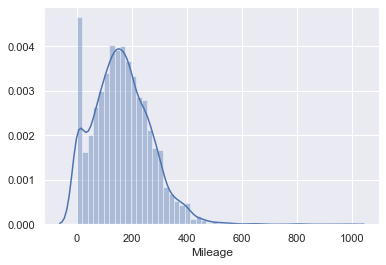

In [38]:
sns.distplot(data_no_mv["Mileage"])

In [39]:
q = data_no_mv["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1510,NaN,NaN,1825,3575,NaN
mean,NaN,17936.780614,NaN,161.414659,2.747497,NaN,NaN,2006.393102
std,NaN,19009.750360,NaN,95.940408,4.981033,NaN,NaN,6.593870
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21417.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


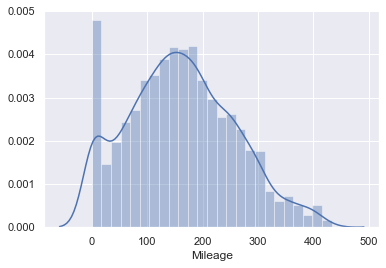

In [40]:
sns.distplot(data_2["Mileage"])

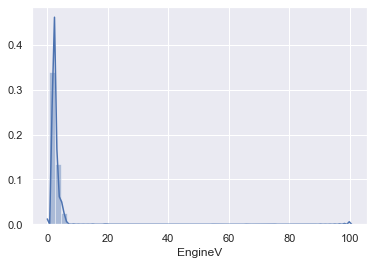

In [41]:
sns.distplot(data_no_mv["EngineV"])

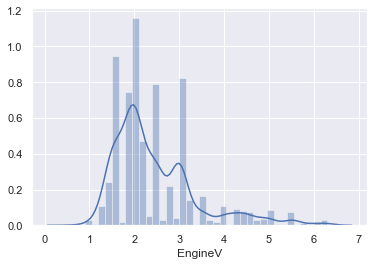

In [42]:
data_3 = data_2[data_2["EngineV"]<6.5]
sns.distplot(data_3["EngineV"])

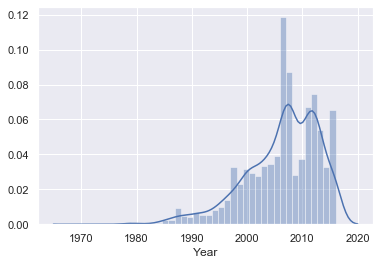

In [43]:
sns.distplot(data_no_mv["Year"])

In [44]:
q = data_no_mv["Year"].quantile(0.99)
data_4 = data_3[data_3["Year"]<q]
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3734,3734.000000,3734,3734.000000,3734.000000,3734,3734,3734.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,831,NaN,1452,NaN,NaN,1694,3372,NaN
mean,NaN,15957.762290,NaN,169.163631,2.446636,NaN,NaN,2005.931441
std,NaN,15481.012959,NaN,91.304234,0.951474,NaN,NaN,6.390005
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,101.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10950.000000,NaN,162.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


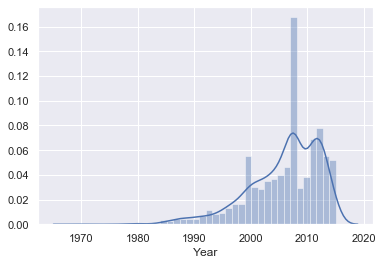

In [45]:
sns.distplot(data_4["Year"])

In [46]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3734,3734.000000,3734,3734.000000,3734.000000,3734,3734,3734.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,831,NaN,1452,NaN,NaN,1694,3372,NaN
mean,NaN,15957.762290,NaN,169.163631,2.446636,NaN,NaN,2005.931441
std,NaN,15481.012959,NaN,91.304234,0.951474,NaN,NaN,6.390005
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,101.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10950.000000,NaN,162.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [ ]:
## OLS ASSUMPTION CHECKING

Text(0.5, 1.0, 'Price and Mileage')

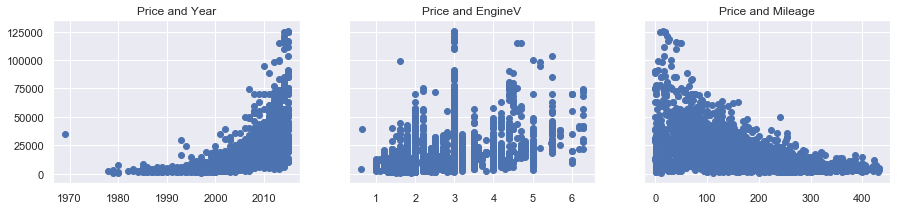

In [53]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title("Price and Mileage")

In [54]:
## Relaxing the assumption
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3729,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3730,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3731,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3732,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


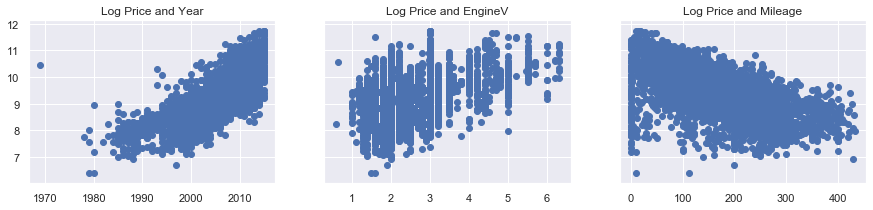

In [57]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title("Log Price and Mileage")
plt.show()

In [60]:
## Multi Colenoarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage","Year","EngineV","Price"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [61]:
vif

,VIF,Features
0,6.475824,Mileage
1,12.259073,Year
2,10.386122,EngineV
3,3.799105,Price


In [62]:
## Creating Dummies
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies

,Price,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,17900.0,35,1.6,2014,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3730,125000.0,9,3.0,2014,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3731,6500.0,1,3.5,1999,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3732,8000.0,194,2.0,1985,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [63]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [64]:
cols = ['log_price','Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [65]:
data_preporssed = data_with_dummies[cols]

In [66]:
data_preporssed

,log_price,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,9.792556,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3730,11.736069,125000.0,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3731,8.779557,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3732,8.987197,8000.0,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [67]:
#Regression Model
#Declearing targets and inputs
targets = data_preporssed["log_price"]
inputs = data_preporssed.drop(["log_price"],axis = 1)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
inputs_scaled = scaler.transform(inputs)

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size = 0.3,random_state = 365)

In [150]:
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
y_hat = reg.predict(x_train)

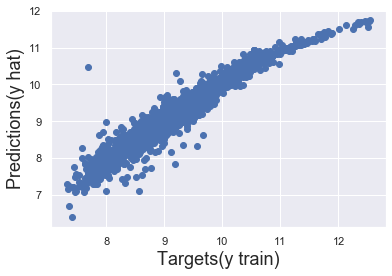

In [152]:
plt.scatter(y_hat,y_train)
plt.xlabel('Targets(y train)',size = 18)
plt.ylabel('Predictions(y hat)',size = 18)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

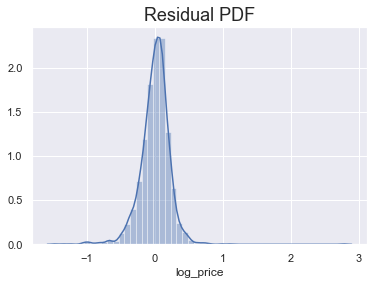

In [153]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF",size = 18)

In [154]:
reg.score(x_train,y_train)

0.9321288361843504

In [155]:
reg.coef_

array([ 3.42436270e-01,  1.18024066e-04,  1.22030324e-01,  3.88015944e-01,
        2.67562604e-02,  8.74948424e-03, -6.27575521e-02, -1.17566766e-01,
       -1.40499461e-02, -3.87096267e-02, -5.95565514e-02, -3.93166548e-02,
       -8.36562419e-02, -5.78301823e-02, -9.22121986e-02, -9.83949452e-03,
       -7.61966882e-03, -1.56179533e-02,  2.11753045e-01])

In [156]:
reg.intercept_

9.324644103402855

In [157]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Price,0.342436
1,Mileage,0.000118
2,EngineV,0.122030
3,Year,0.388016
4,Brand_BMW,0.026756
5,Brand_Mercedes-Benz,0.008749
6,Brand_Mitsubishi,-0.062758
7,Brand_Renault,-0.117567
8,Brand_Toyota,-0.014050
9,Brand_Volkswagen,-0.038710


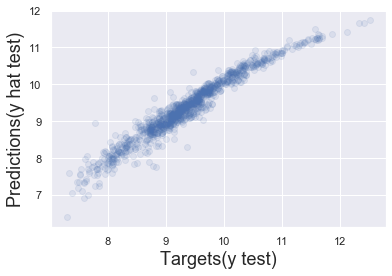

In [158]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_hat_test,y_test,alpha=0.1)
plt.xlabel('Targets(y test)',size = 18)
plt.ylabel('Predictions(y hat test)',size = 18)
plt.show()

In [159]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=["Predictions"])
df_pf

,Predictions
0,23353.533090
1,6246.247412
2,7870.391516
3,17782.000629
4,11562.660105
5,15412.252526
6,9853.105251
7,52293.218468
8,3976.174289
9,8787.468161


In [160]:
df_pf["Target"] = np.exp(y_test)

In [161]:
df_pf

,Predictions,Target
0,23353.533090,NaN
1,6246.247412,7900.00
2,7870.391516,NaN
3,17782.000629,NaN
4,11562.660105,NaN
5,15412.252526,14200.00
6,9853.105251,NaN
7,52293.218468,1400.00
8,3976.174289,11950.00
9,8787.468161,NaN


In [162]:
y_test

902     10.173515
503      8.779557
3107     8.809714
3610     9.928180
2263     9.367344
2647     9.814656
159      9.220291
1241    10.778956
3406     8.055158
2737     8.802372
2111    10.126471
3134    11.018629
2130     7.346010
2044     9.350102
995     10.146434
18       8.824678
275      8.922658
1465     8.039157
544      8.922658
1729     9.047821
1328     8.935904
3145     9.525151
3540    10.488493
3014     9.846917
837     10.419301
507      8.922658
167      9.472628
3020     8.915969
19       9.259131
720      9.602382
821      9.581904
2617     8.160518
1160     8.961879
881     10.232791
3021    10.373179
151      8.779557
2827     8.268732
2179     8.824678
1692    10.345317
2121     9.148465
1323     9.268609
3042     9.268609
590      8.948976
3193     9.581904
1208     9.798127
2304    10.532096
2582     9.903438
1530     9.495519
2109     9.705037
3305     9.998798
2926    11.134589
2894     9.047821
2242     8.999619
769     10.325482
1997     9.249561
1110     9

In [163]:
y_test = y_test.reset_index(drop = True)
y_test

0       10.173515
1        8.779557
2        8.809714
3        9.928180
4        9.367344
5        9.814656
6        9.220291
7       10.778956
8        8.055158
9        8.802372
10      10.126471
11      11.018629
12       7.346010
13       9.350102
14      10.146434
15       8.824678
16       8.922658
17       8.039157
18       8.922658
19       9.047821
20       8.935904
21       9.525151
22      10.488493
23       9.846917
24      10.419301
25       8.922658
26       9.472628
27       8.915969
28       9.259131
29       9.602382
30       9.581904
31       8.160518
32       8.961879
33      10.232791
34      10.373179
35       8.779557
36       8.268732
37       8.824678
38      10.345317
39       9.148465
40       9.268609
41       9.268609
42       8.948976
43       9.581904
44       9.798127
45      10.532096
46       9.903438
47       9.495519
48       9.705037
49       9.998798
50      11.134589
51       9.047821
52       8.999619
53      10.325482
54       9.249561
55       9

In [164]:
df_pf["Target"] = np.exp(y_test)
df_pf


,Predictions,Target
0,23353.533090,26200.00
1,6246.247412,6500.00
2,7870.391516,6699.00
3,17782.000629,20500.00
4,11562.660105,11700.00
5,15412.252526,18300.00
6,9853.105251,10100.00
7,52293.218468,48000.00
8,3976.174289,3150.00
9,8787.468161,6650.00


In [165]:
df_pf["Residual"] = df_pf["Predictions"] - df_pf["Target"]
df_pf

,Predictions,Target,Residual
0,23353.533090,26200.00,-2846.466910
1,6246.247412,6500.00,-253.752588
2,7870.391516,6699.00,1171.391516
3,17782.000629,20500.00,-2717.999371
4,11562.660105,11700.00,-137.339895
5,15412.252526,18300.00,-2887.747474
6,9853.105251,10100.00,-246.894749
7,52293.218468,48000.00,4293.218468
8,3976.174289,3150.00,826.174289
9,8787.468161,6650.00,2137.468161


In [166]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)

In [167]:
df_pf

,Predictions,Target,Residual,Difference%
0,23353.533090,26200.00,-2846.466910,10.864378
1,6246.247412,6500.00,-253.752588,3.903886
2,7870.391516,6699.00,1171.391516,17.486065
3,17782.000629,20500.00,-2717.999371,13.258534
4,11562.660105,11700.00,-137.339895,1.173845
5,15412.252526,18300.00,-2887.747474,15.780041
6,9853.105251,10100.00,-246.894749,2.444502
7,52293.218468,48000.00,4293.218468,8.944205
8,3976.174289,3150.00,826.174289,26.227755
9,8787.468161,6650.00,2137.468161,32.142378


In [168]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,1121.000000,1121.000000,1121.000000,1121.000000
mean,17112.437112,16436.042694,676.394418,16.014898
std,22057.219269,15838.389887,9085.642516,18.000991
min,1471.301440,600.000000,-17758.197083,0.036856
25%,7066.421782,6999.000000,-1591.255784,5.408703
50%,10986.257043,11200.000000,-135.313873,11.876744
75%,17454.016146,19700.000000,947.443943,20.187465
max,274179.511936,125000.000000,149179.511936,198.946537


In [169]:
pd.options.display.max_rows = 1121
df_pf.sort_values(by=["Difference%"])

,Predictions,Target,Residual,Difference%
981,10296.203876,10300.00,-3.796124,0.036856
482,37720.906446,37700.00,20.906446,0.055455
224,44032.216070,44000.00,32.216070,0.073218
382,9892.361055,9900.00,-7.638945,0.077161
48,16385.020407,16400.00,-14.979593,0.091339
46,19975.082368,19999.00,-23.917632,0.119594
840,1847.583259,1850.00,-2.416741,0.130635
646,23543.862850,23500.00,43.862850,0.186650
707,13873.015695,13900.00,-26.984305,0.194132
810,11523.609150,11550.00,-26.390850,0.228492


In [170]:
reg.score(x_test,y_test)

0.9395267944081749

In [171]:
reg.score(x_train,y_train)

0.9321288361843504

In [172]:
df_pf

,Predictions,Target,Residual,Difference%
0,23353.533090,26200.00,-2846.466910,10.864378
1,6246.247412,6500.00,-253.752588,3.903886
2,7870.391516,6699.00,1171.391516,17.486065
3,17782.000629,20500.00,-2717.999371,13.258534
4,11562.660105,11700.00,-137.339895,1.173845
5,15412.252526,18300.00,-2887.747474,15.780041
6,9853.105251,10100.00,-246.894749,2.444502
7,52293.218468,48000.00,4293.218468,8.944205
8,3976.174289,3150.00,826.174289,26.227755
9,8787.468161,6650.00,2137.468161,32.142378


{'whiskers': [<matplotlib.lines.Line2D at 0x1e53d446e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1e53d45ea48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e53d459948>],
 'medians': [<matplotlib.lines.Line2D at 0x1e53d4639c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e53d463f48>],
 'means': []}

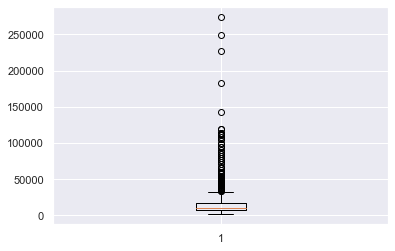

In [181]:
plt.boxplot(df_pf["Predictions"])